<h2 style="color:black"><center>Shuffle an Array</center></h2>
<h3 style="color:black">Problem:</h3>
<p>Shuffle a set of numbers without duplicates</p>




                 MY SHUFFLE 1000                  


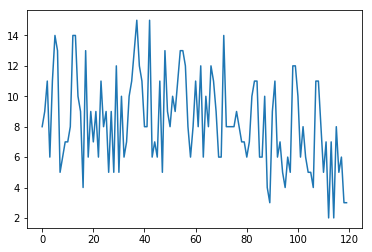

Mean: 8.333333333333334
Std dev: 2.9674156357941426



              STANDARD SHUFFLE 1000               


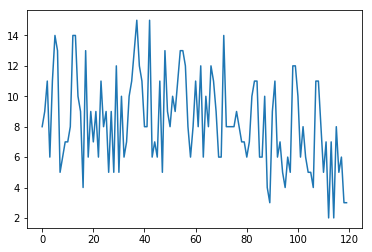

Mean: 8.333333333333334
Std dev: 2.9674156357941426



                WRONG SHUFFLE 1000                


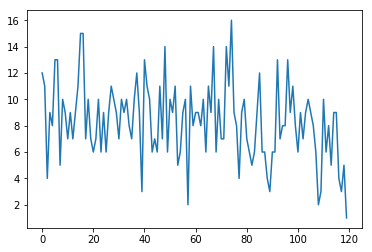

Mean: 8.333333333333334
Std dev: 2.913569784454954



                NAIVE SHUFFLE 1000                


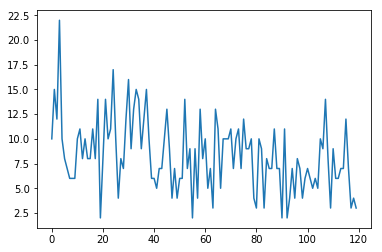

Mean: 8.333333333333334
Std dev: 3.5714920629277



                 MY SHUFFLE 10000                 


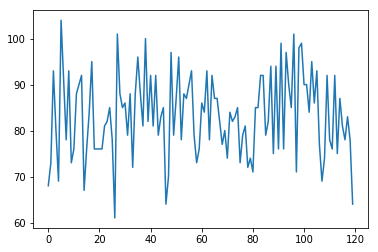

Mean: 83.33333333333333
Std dev: 8.912849650302023



              STANDARD SHUFFLE 10000              


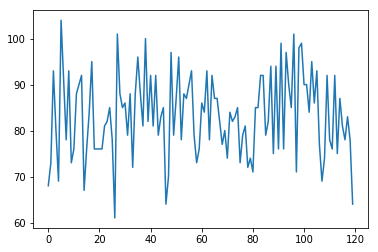

Mean: 83.33333333333333
Std dev: 8.912849650302023



               WRONG SHUFFLE 10000                


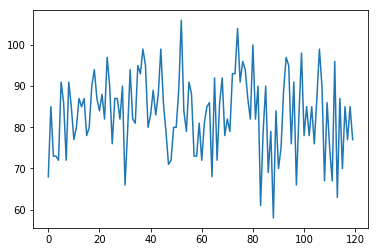

Mean: 83.33333333333333
Std dev: 9.400650095723286



               NAIVE SHUFFLE 10000                


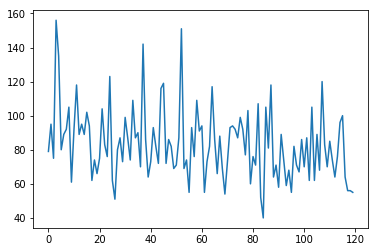

Mean: 83.33333333333333
Std dev: 20.70842555311458



                 MY SHUFFLE 25000                 


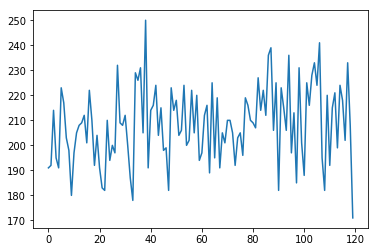

Mean: 208.33333333333334
Std dev: 15.17087853604911



              STANDARD SHUFFLE 25000              


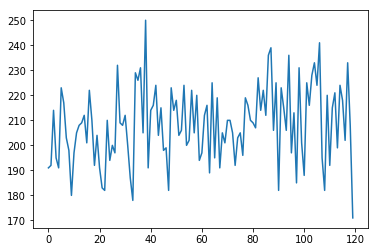

Mean: 208.33333333333334
Std dev: 15.17087853604911



               WRONG SHUFFLE 25000                


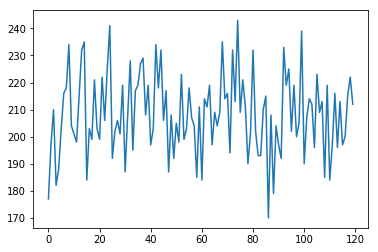

Mean: 208.33333333333334
Std dev: 14.760495324419917



               NAIVE SHUFFLE 25000                


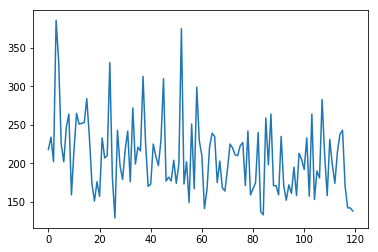

Mean: 208.33333333333334
Std dev: 48.16799306132191



                 MY SHUFFLE 50000                 


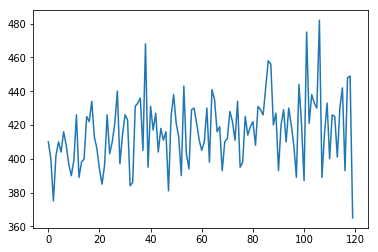

Mean: 416.6666666666667
Std dev: 20.05714059602936



              STANDARD SHUFFLE 50000              


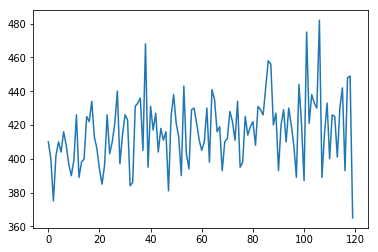

Mean: 416.6666666666667
Std dev: 20.05714059602936



               WRONG SHUFFLE 50000                


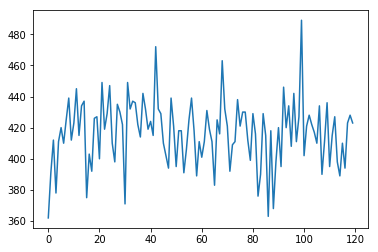

Mean: 416.6666666666667
Std dev: 20.867571865350207



               NAIVE SHUFFLE 50000                


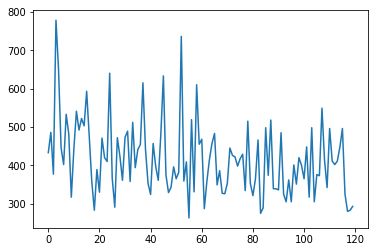

Mean: 416.6666666666667
Std dev: 95.03475972272227



                MY SHUFFLE 100000                 


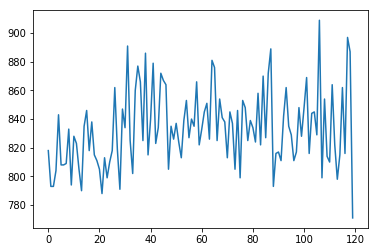

Mean: 833.3333333333334
Std dev: 26.645616691848



             STANDARD SHUFFLE 100000              


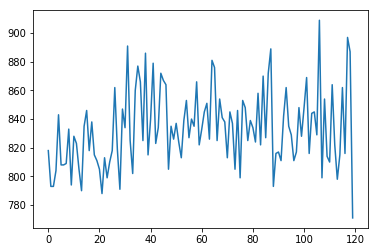

Mean: 833.3333333333334
Std dev: 26.645616691848



               WRONG SHUFFLE 100000               


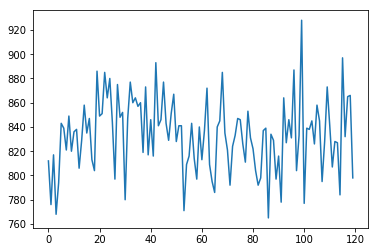

Mean: 833.3333333333334
Std dev: 30.0000925924497



               NAIVE SHUFFLE 100000               


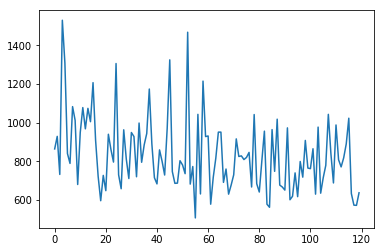

Mean: 833.3333333333334
Std dev: 188.73006885202182

[5, 3, 4, 2, 1]
[5, 4, 1, 2, 3]


In [5]:
import collections
from matplotlib import pyplot as plt
import numpy as np
import random


def shuffle_array(arr):
    N = len(arr) - 1
    for i in range(N):
        j = random.randint(i, N)
        arr[i], arr[j] = arr[j], arr[i]


def shuffle_array_naive(arr):
    N = len(arr)
    for i in range(N):
        j = random.randint(0, N - 1)
        arr[i], arr[j] = arr[j], arr[i]


def shuffle_array_wrong(arr):
    N = len(arr)
    for i in range(N):
        j = random.randint(0, i)
        arr[i], arr[j] = arr[j], arr[i]


def test_shuffle_array():
    arr = tuple(range(5))
    test_sizes = (1000, 10000, 25000, 50000, 100000)
    for n in test_sizes:
        random.seed(817)
        c = _shuffle_repeat(arr, n, shuffle_array)
        random.seed(817)
        w = _shuffle_repeat(arr, n, shuffle_array_wrong)
        random.seed(817)
        s = _shuffle_repeat(arr, n, random.shuffle)
        random.seed(817)
        x = _shuffle_repeat(arr, n, shuffle_array_naive)
        _report_counter(c, 'My shuffle ' + str(n))
        _report_counter(s, 'Standard shuffle ' + str(n))
        _report_counter(w, 'Wrong shuffle ' + str(n))
        _report_counter(x, 'Naive shuffle ' + str(n))


def _shuffle_repeat(arr, n, shuffle_func=None):
    """Shuffles an array @arr @n number of times
    and returns collections.Counter() object from
    all shuffle results."""
    
    if shuffle_func is None:
        shuffle_func = shuffle_array
    
    result = collections.Counter()
    for _ in range(n):
        a = list(arr)
        shuffle_func(a)
        result.update((tuple(a),))
    return result


def _report_counter(counter, name=None):
    """Prints statistics about @counter"""
    
    values = []
    for k, v in counter.items():
        values.append(v)

    print('\n\n{0:^50}'.format(name.upper()))
    values = np.array(values, dtype=np.int32)
    plt.plot(values)
    plt.show()
    print('Mean: {}'.format(values.mean()))
    print('Std dev: {}'.format(values.std()))
    print()


test_shuffle_array()

random.seed(45)
arr1 = [1, 2, 3, 4, 5]
arr2 = list(arr1)
shuffle_array_wrong(arr1)
random.seed(45)
print(arr1)
shuffle_array_naive(arr2)
print(arr2)